# <CENTER><div class="alert alert-block alert-info">ThinkBio: Exploration des données d'achats de produits phytopharmaceutiques<CENTER>

Les données d'achats de PPP à disposition présentent les caractéristiques suivantes:
- Couverture temporelle: 2013 – 2021
- Couverture spatiale: France entière
- Granularité spatiale: Code postal de l’acheteur

Liens pour téléchargment ou informations complémentaires:
* Accès aux données:
    - https://data.eaufrance.fr/jdd/a69c8e76-13e1-4f87-9f9d-1705468b7221
    - https://www.data.gouv.fr/fr/datasets/achats-de-pesticides-par-code-postal/
* Informations Complémentaires: 
    - https://ventes-produits-phytopharmaceutiques.eaufrance.fr/about

**Organisation des données**

Chaque édition des données (ou millésime) est compactée dans un fichier ZIP (nom type BNVD_année de publication_ACHAT.zip), comportant lui-même un ensemble de fichiers ZIP (nom type BNVD_date de publication au format AAAAMMJJ_ACHAT_année des achats.zip), comportant chacun un ensemble de fichiers au format CSV encodés en UTF8 sans signature. Pour limiter le poids des fichiers, les données sont découpées par année d’achat (et par région pour les données au code postal de l’acheteur).
Le nom des fichiers adopte le format suivant :
- BNVD_TRACABILITE_date de publication_ACHAT_CP_PRODUIT_région_année des achats.csv pour les données des produits achetés par zone postale dans une région donnée ;
- BNVD_TRACABILITE_date de publication_ACHAT_CP_SUBSTANCE_région_année des achats.csv pour les données des substances achetées par zone postale dans une région donnée ;
- BNVD_TRACABILITE_date de publication_ACHAT_DPT_PRODUIT_année des achats.csv pour les données des produits achetés par département ;
- BNVD_TRACABILITE_date de publication_ACHAT_DPT_SUBSTANCE_année des achats.csv pour les données des substances achetées par département ;
- BNVD_TRACABILITE_date de publication_ACHAT_FR_PRODUIT_année des achats.csv pour les données des produits achetés sur le territoire national ;
- BNVD_TRACABILITE_date de publication_ACHAT_FR_SUBSTANCE_année des achats.csv pour les données des substances achetées sur le territoire national.

**Traitement limitant l’identification des acheteurs**

*Niveau 1*:
Les données d’une zone postale sont diffusées sous réserve d’un traitement visant à limiter l’identification des acheteurs. Ainsi, la mention nc (pour non communiquée) est attribuée aux données des zones postales regroupant 1 à 5 acheteurs potentiels.

*Niveau 2*:
Les données non communiquées à l’échelle d’une zone postale sont agrégées et fournies aux niveaux départemental et national.

**Objectif**

Faire une exploration des jeux de données pour ensuite les aggréger ensemble pour:
- 1/ avoir toutes les données différencier par code postaux dans un seul jeu de données pour une années
- 2/ ressembler les différentes années
- 3/ passer de l'échelle code postale à l'échelle commune

### <a name="C00">Sommaire</a>

- <a href="#C0">0. Importation des librairies</a>
- <a href="#C1">1. Exploration du fichier des codes postaux</a>
- <a href="#C2">2. Exploration des données d'achat de 2022</a>
    - <a href="#C21">2.1. Création de dataframes Pandas</a>
    - <a href="#C22">2.2. Exploration du dataframe concernant les produits</a>
        - <a href="#C221">2.2.1. Généralités</a>
        - <a href="#C222">2.2.2. Exploration des variables</a>
    - <a href="#C23">2.3. Exploration du dataframe concernant les substances</a>
        - <a href="#C231">2.3.1. Généralités</a>
        - <a href="#C232">2.3.2. Exploration des variables</a>
    - <a href="#C24">2.4. Comparaison df_produit vs df_substance</a>
- <a href="#C3">3. Ramener les codes postaux en commune</a>

<code style="background:lightyellow;color:black">Retour au <a href="#C00">Sommaire</a></code>

# <div class="alert alert-block alert-info"><a name="C0">0. Importation des librairies</a></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import zipfile
import os
from pathlib import Path

from utils import (hist_distrib,
                   hist_distrib_cat)

<code style="background:lightyellow;color:black">Retour au <a href="#C00">Sommaire</a></code>

# <div class="alert alert-block alert-info"><a name="C1">1. Exploration du fichier des codes postaux</a></div>

Les informations concernant les codes postaux ont été téléchargé sur le site (mise à jour le 16 avril 2023): https://www.data.gouv.fr/fr/datasets/base-officielle-des-codes-postaux/#/resources.
Ce jeu de données contient les codes postaux pour les communes situées en France métropolitaine ainsi que dans les DOM-TOM et Monaco

Description du fichier
- Code_commune_INSEE: code_commune_insee[text]
- Nom_commune: nom_de_la_commune[text]
- Code_postal: code_postal[text]
- Ligne_5: ligne_5[text] Ligne 5 dans l’écriture de l’adresse, utilisée notamment pour préciser l’ancienne commune ou le lieu-dit
- Libellé_d_acheminement: libelle_d_acheminement[text]
- coordonnees_geographiques: coordonnees_geographiques[geo_point_2d]

In [7]:
df_cp = pd.read_csv('C:/Users/virgi/Nextcloud/ThinkBio/data/laposte_hexasmal.csv',
                    delimiter=';')
df_cp.head()

code_commune_insee nom_de_la_commune  code_postal  ligne_5  \
0              12101           FLAGNAC        12300      NaN   
1              12116          HUPARLAC        12460      NaN   
2              12143          MELAGUES        12360      NaN   
3              12147         MONTAGNOL        12360  CENOMES   
4              12154          MONTLAUR        12400      NaN   

  libelle_d_acheminement coordonnees_geographiques  
0                FLAGNAC  44.593404602,2.264840963  
1               HUPARLAC  44.711087639,2.753632775  
2               MELAGUES  43.727854164,3.016705208  
3              MONTAGNOL  43.831393077,3.024302478  
4               MONTLAUR  43.865349416,2.833674997

In [8]:
# Connaitre la taille
print("Le jeu de données se compose de",
      df_cp.shape[0], "lignes et",
      df_cp.shape[1], "colonnes.")

Le jeu de données se compose de 39193 lignes et 6 colonnes.


In [9]:
# Afficher les informations sur le jeu de données
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39193 entries, 0 to 39192
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   code_commune_insee         39193 non-null  object
 1   nom_de_la_commune          39193 non-null  object
 2   code_postal                39193 non-null  int64 
 3   ligne_5                    4696 non-null   object
 4   libelle_d_acheminement     39193 non-null  object
 5   coordonnees_geographiques  39193 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.8+ MB


In [10]:
# Vérifier la présence de valeurs dupliquées
print("Nombre de valeurs dupliquées:", df_cp.duplicated().sum())

Nombre de valeurs dupliquées: 0


Il n'y a aucune ligne entiérement dupliquée. Mais existe-il des lignes ayant les mêmes code_commune_insee, nom_de_la_commune, code_postal et coordonnees_geographique?

In [11]:
# Vérifier la présence de valeurs dupliquées
print("Nombre de valeurs dupliquées:", df_cp[['code_commune_insee',
                                              'nom_de_la_commune',
                                              'code_postal',
                                              'coordonnees_geographiques']].duplicated().sum())

Nombre de valeurs dupliquées: 3614


Pour ce projet, nous avons besoin de données qui nous permettent de relier un code postal au nom de la commune. Nous n'avons donc pas besoin:
- des informations concernant les variables ligne_5 et libelle_d_acheminement -> suppression de ces variables
- de garder les valeurs dupliquées -> suppression de ces valeurs

In [12]:
# Supprimer les variables non informatives pour le projet
df_cp.drop(['ligne_5', 'libelle_d_acheminement'], axis=1, inplace=True)
df_cp.shape

(39193, 4)

In [13]:
# Supprimer les valeurs dupliquées
df_cp.drop_duplicates(keep = 'first', inplace=True)
df_cp.shape

(35579, 4)

**Exploration du jeu de données**

In [14]:
# Connaitre le nombre de valeur unique
nb_valeur_unique_cp = len(df_cp['code_postal'].unique())
print("Nombre de codes postaux présents dans ce dataframe: ",
      nb_valeur_unique_cp)

Nombre de codes postaux présents dans ce dataframe:  6328


Il y a seulement 6328 codes postaux différents pour 34945 communes. Il semblerait qu' un même code postale puisse correspondre à plusieurs communes. 
A présent, des histogrammes vont être créer pour visualiser la correspondance entre nom_de_commune et code_postal.

* Est ce qu'un même code postal peut être utilisé pour plusieurs communes?

In [15]:
cp_agg_code = df_cp[['nom_de_la_commune', 'code_postal']].groupby('code_postal',
                                                                   as_index=False).count()

cp_agg_code.columns = ['code_postal', 'count']

cp_agg_code.head()

code_postal  count
0         1000      2
1         1090      6
2         1100      7
3         1110      6
4         1120      7

        code_postal        count
count   6328.000000  6328.000000
mean   51476.536979     5.622472
std    27530.338547     6.043636
min     1000.000000     1.000000
25%    28075.000000     1.000000
50%    54675.000000     3.000000
75%    74202.500000     8.000000
max    98890.000000    46.000000


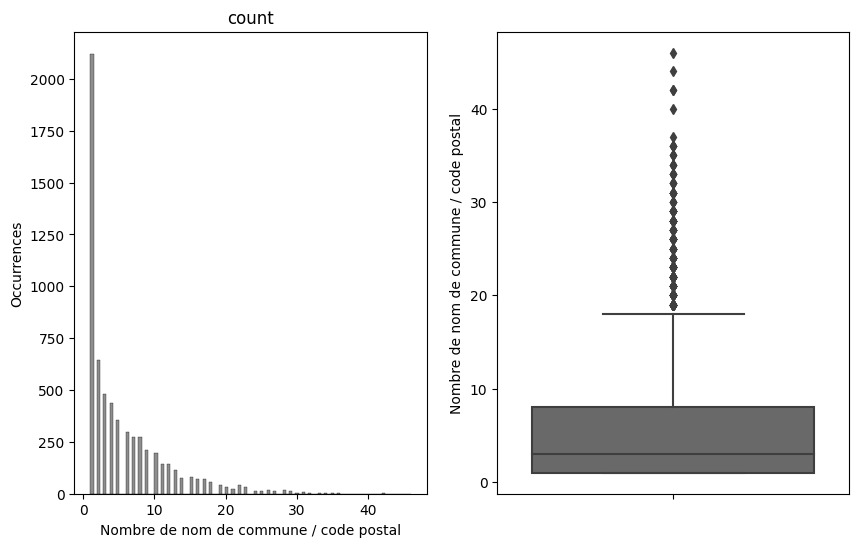

In [16]:
print(cp_agg_code.describe())

hist_distrib(cp_agg_code,
             variable='count',
             unit_label='Nombre de nom de commune / code postal')

La majorité des codes postaux ne sont associés qu'à un unique nom de commune mais il peut y avoir jusqu'à 46 communes avec le même code postal.

* Est ce qu'un même nom de commune peut avoir différents codes postaux?

In [17]:
cp_agg_nom = df_cp[['nom_de_la_commune', 'code_postal']].groupby('nom_de_la_commune',
                                                                 as_index=False).count()

cp_agg_nom.columns = ['nom_de_la_commune', 'count']

cp_agg_nom.head()

nom_de_la_commune  count
0                  AAST      1
1            ABAINVILLE      1
2             ABANCOURT      2
3             ABAUCOURT      1
4  ABAUCOURT HAUTECOURT      1

Nombre de commune avec plusieurs codes postaux:  1867


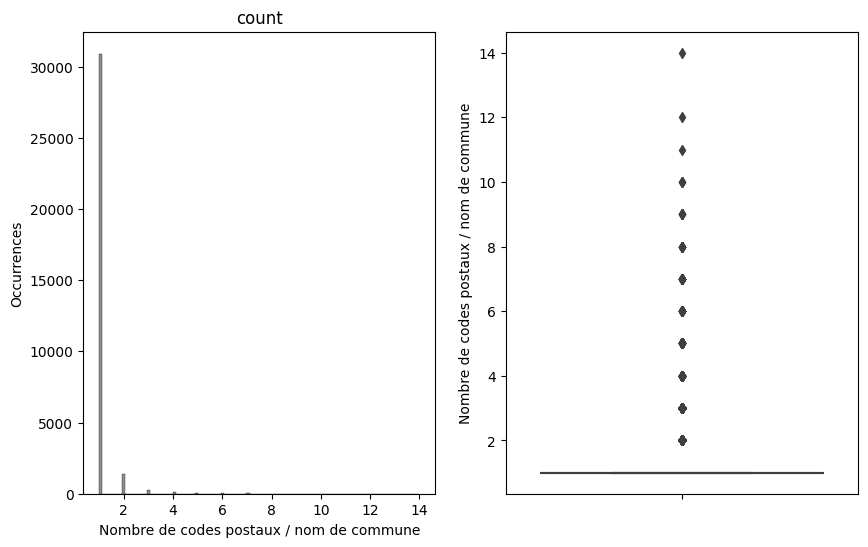

In [18]:
print("Nombre de commune avec plusieurs codes postaux: ",
      len(cp_agg_nom.loc[cp_agg_nom['count'] > 1]))

hist_distrib(cp_agg_nom,
             variable='count',
             unit_label='Nombre de codes postaux / nom de commune')

Il y a 1867 communes possèdant entre 2 et 14 codes postaux. Toutefois, cela ne devrait pas poser de problème pour notre projet.

<code style="background:lightyellow;color:black">Retour au <a href="#C00">Sommaire</a></code>

# <div class="alert alert-block alert-info"><a name="C2">2. Exploration des données d'achat de 2021</a></div>

## <div class="alert alert-block alert-info"><a name="C21">2.1. Création de dataframes Pandas</a></div>

**Définir le fichiers zip d'origine (provenant du téléchargement) et un fichier zip pour mettre tout les fichiers avec des noms sans espaces** 

In [2]:
# Chemin d'accés vers le dossier contenant les data avec les fichiers renommés sans espaces
path = 'C:/Users/virgi/Nextcloud/ThinkBio/data/BNVD_TRACABILITE_20221018_ACHAT_2021_rename.zip'


if os.path.exists(path) == False:
    source_z = zipfile.ZipFile('C:/Users/virgi/Nextcloud/ThinkBio/data/BNVD_TRACABILITE_20221018_ACHAT_2021.zip', 'r')
    target_z = zipfile.ZipFile('C:/Users/virgi/Nextcloud/ThinkBio/data/BNVD_TRACABILITE_20221018_ACHAT_2021_rename.zip', 'w', zipfile.ZIP_DEFLATED)

    # Renommer les fichiers qui contiennent des espaces
    for file in source_z.filelist:
        if ' ' in file.filename:
            newfilename = file.filename.replace(" ", "_")
            target_z.writestr(newfilename, source_z.read(file.filename))
        else:
            target_z.writestr(file.filename, source_z.read(file.filename))

    target_z.close()
    source_z.close()

else:
    print("File names already without space")

File names already without space


**Ouvrir les fichiers contenus dans le dossier Zip dans des dataframes pandas**

In [3]:
target_z = zipfile.ZipFile('C:/Users/virgi/Nextcloud/ThinkBio/data/BNVD_TRACABILITE_20221018_ACHAT_2021_rename.zip')
                           
all_files = target_z.infolist()

# Créer des listes pour avoir le nom des jeux de données pour les produits et les substances avec les codes postaux

for all_file in all_files:
    all_name = all_file.filename
    
    if all_name.endswith ('.csv'):
        fname = all_name.split('.')[0]
        # Définir un nom plus court pour les dataframes
        fname = fname.replace('BNVD_TRACABILITE_20221016_ACHAT_', 'df_')
        
        # Créer un dataframe pandas avec le nom correspondant au fichier csv 
        exec("{} = pd.read_csv(target_z.open(all_name), delimiter=';', low_memory=False)".format(fname))
        
        # Créer des dataframe pour les données avec codes postaux spécifique pour les substances et les produits
        if 'CP_PRODUIT' in fname:
            if 'df_produit' not in locals():
                df_produit = pd.read_csv(target_z.open(all_name), delimiter=';', low_memory=False)
            else:
                df_produit = pd.concat([df_produit, pd.read_csv(target_z.open(all_name), delimiter=';', low_memory=False)], ignore_index=True)
        if 'CP_SUBSTANCE' in fname:
            if 'df_substance' not in locals():
                df_substance = pd.read_csv(target_z.open(all_name), delimiter=';', low_memory=False)
            else:
                 df_substance = pd.concat([df_substance, pd.read_csv(target_z.open(all_name), delimiter=';', low_memory=False)], ignore_index=True)

<code style="background:lightyellow;color:black">Retour au <a href="#C00">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C22">2.2. Exploration du dataframe concernant les produits</a></div>

**Information pertinente**: Pour les zones postales concernées par le traitement limitant l'identification des acheteurs, la valeur nc est attribuée aux champs amm, quantite_produit, conditionnement, eaj, achat etranger. 

### <div class="alert alert-block alert-info"><a name="C221">2.2.1. Généralités</a></div>

In [21]:
# Afficher les premières lignes
df_produit.head()

annee  code_postal_acheteur      amm quantite_produit conditionnement  eaj  \
0   2021                  1000  2000122              0.1               l  Non   
1   2021                  1000  2000125             58.1              kg  Oui   
2   2021                  1000  2000201              100               l  Non   
3   2021                  1000  2000202               20               l  Non   
4   2021                  1000  2010531                5               l  Non   

  achat_etranger  
0            Non  
1            Non  
2            Non  
3            Non  
4            Non

Les variables présentes sont:
- 'annee': Année de l'achat
- 'code_postal_acheteur': code postal des acheteurs
- 'amm': Numéro d'autorisation de mise sur le marché du PPP
- 'quantite_produit': quantité de produit achetée exprimée dans l'unité de conditionnement avec une seule décimale
- 'conditionnement': Unité de conditionnement du PPP
- 'eaj': produit d'emploi autorisé dans les jardins
- 'achat_etranger': indicateur oui/non d'une quantité incluant ou nom des achats effectués auprès de distributeurs établis à l'étranger

In [22]:
# Connaitre la taille
print("Le jeu de données sur les produits se compose de",
      df_produit.shape[0], "lignes et",
      df_produit.shape[1], "colonnes.")

Le jeu de données sur les produits se compose de 1865462 lignes et 7 colonnes.


In [23]:
# Vérifier que la taille correspond bien a la somme de tout les fichiers
somme = (df_CP_PRODUIT_AUVERGNE_RHONE_ALPES_2021.shape[0] 
         + df_CP_PRODUIT_BOURGOGNE_FRANCHE_COMTE_2021.shape[0]
         + df_CP_PRODUIT_BRETAGNE_2021.shape[0]
         + df_CP_PRODUIT_CENTRE_VAL_DE_LOIRE_2021.shape[0]
         + df_CP_PRODUIT_CORSE_2021.shape[0]
         + df_CP_PRODUIT_GRAND_EST_2021.shape[0]
         + df_CP_PRODUIT_GUADELOUPE_2021.shape[0]
         + df_CP_PRODUIT_GUYANE_2021.shape[0]
         + df_CP_PRODUIT_HAUTS_DE_FRANCE_2021.shape[0]
         + df_CP_PRODUIT_ILE_DE_FRANCE_2021.shape[0]
         + df_CP_PRODUIT_INDETERMINE_2021.shape[0]
         + df_CP_PRODUIT_LA_REUNION_2021.shape[0]
         + df_CP_PRODUIT_MARTINIQUE_2021.shape[0]
         + df_CP_PRODUIT_MAYOTTE_2021.shape[0]
         + df_CP_PRODUIT_NORMANDIE_2021.shape[0]
         + df_CP_PRODUIT_NOUVELLE_AQUITAINE_2021.shape[0]
         + df_CP_PRODUIT_OCCITANIE_2021.shape[0]
         + df_CP_PRODUIT_PAYS_DE_LA_LOIRE_2021.shape[0]
         + df_CP_PRODUIT_PROVENCE_ALPES_COTE_D_AZUR_2021.shape[0]
         )

if somme == df_produit.shape[0]:
    print("La concaténétation a été bien réalisée")
else:
    print("Un problème est survenue lors de la concaténétation")

Un problème est survenue lors de la concaténétation


In [24]:
# Afficher les informations sur le jeu de données
df_produit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865462 entries, 0 to 1865461
Data columns (total 7 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   annee                 int64 
 1   code_postal_acheteur  int64 
 2   amm                   object
 3   quantite_produit      object
 4   conditionnement       object
 5   eaj                   object
 6   achat_etranger        object
dtypes: int64(2), object(5)
memory usage: 99.6+ MB


On peut observer qu'aucune valeur n'est manquante. 

In [25]:
# Vérifier la présence de valeurs dupliquées
print("Nombre de valeurs dupliquées:", df_produit.duplicated().sum())

Nombre de valeurs dupliquées: 932731


Il n'y a pas de valeur dupliquée dans le dataframe.

<code style="background:lightyellow;color:black">Retour au <a href="#C00">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="222">2.2.2. Exploration des variables</a></div>

**annee**

In [26]:
# Quelles sont les valeurs possibles de cette variables?
df_produit['annee'].unique()

array([2021], dtype=int64)

Cette variable ne contient que la valeur 2021. Comme l'objectif de ce projet est de créer un jeu de données comportant les données sur plusieurs années, je choisi de garder cette variable.

**code_postal_acheteur**

In [27]:
# Connaitre le nombre de valeur unique
list_cp_produit = df_produit['code_postal_acheteur'].unique()
nb_cp_produit = len(list_cp_produit)
print("Nombre de codes postaux présents dans le dataframe", nb_cp_produit)

Nombre de codes postaux présents dans le dataframe 5948


Est-ce que les codes postaux contenus dans ce jeu de données font partis des codes postaux officiels.

In [28]:
cp_non_officiel = []
cp_officiel = []

list_cp_produit.sort()

list_cp_officiel = df_cp['code_postal'].sort_values().tolist()

for i in range(len(list_cp_produit)):
    if list_cp_produit[i] not in list_cp_officiel:
        cp_non_officiel.append(list_cp_produit[i])
    else:
        cp_officiel.append(list_cp_produit[i])

if len(cp_non_officiel) == 0:
    print("Tout les codes postaux font partis des codes postaux officiels")
else:
    print("{nb} codes postaux officiels sont présents".format(nb=len(cp_officiel)))
    print("{nb} codes postaux non officiels sont présents".format(nb=len(cp_non_officiel)))

5947 codes postaux officiels sont présents
1 codes postaux non officiels sont présents


Quel est le code postal non officiel? Pour combien de lignes retrouvons-nous ce code?

In [29]:
# Connaître la valeur du code non officiel
print("Valeur du code non officiel: ", cp_non_officiel)

# Connaître le nombre de lignes concernées
lignes_cp_non_officiel = df_produit.loc[df_produit['code_postal_acheteur'] == cp_non_officiel[0]]
print("Nombre de lignes concernées: ", lignes_cp_non_officiel.shape[0],
      "soit", (lignes_cp_non_officiel.shape[0] *100) / df_produit.shape[0], "%")

Valeur du code non officiel:  [0]
Nombre de lignes concernées:  2450 soit 0.13133475782406717 %


Ces lignes pourraient correspondre aux zones postales concernées par le traitement limitant l'identification des utilisateurs.

In [30]:
# Connaitre la quantite de produit totale
df_tmp = df_produit.loc[df_produit['quantite_produit'] != 'nc']
quantite_produit_total = df_tmp['quantite_produit'].astype(float).sum()

# Connaitre la quantite de produit sans code postal
quantite_produit_non_officiel = lignes_cp_non_officiel['quantite_produit'].astype(float).sum()

print("Quantité de produit total: ", quantite_produit_total)
print("Quantité de produit sans code postal: ",
      quantite_produit_non_officiel,
      "soit ", (quantite_produit_non_officiel * 100) / quantite_produit_total,
      "%")

Quantité de produit total:  334721650.7796001
Quantité de produit sans code postal:  5447593.402000001 soit  1.6274995624908077 %


**amm**

In [31]:
# Connaitre le nombre de valeur unique
list_amm_produit = df_produit['amm'].unique()
nb_amm_produit = len(list_amm_produit)
print("Nombre de numéro amm présents dans le dataframe", nb_amm_produit)

Nombre de numéro amm présents dans le dataframe 4416


**quantite_produit**


Pour certaines lignes, les quantités de produit correspondent à 'nc' ('non communiqué') pour les zones postales concernées par le traitement limitant l'identification des acheteurs. Ces lignes empêchent de transformer au format float.
Combien de lignes sont concernées?

In [32]:
df_nc_produit = df_produit.loc[df_produit['quantite_produit'] == 'nc']
print("Nombre de lignes concernées par des valeurs nc: ", df_nc_produit.shape[0])
df_nc_produit.head()

Nombre de lignes concernées par des valeurs nc:  442


annee  code_postal_acheteur amm quantite_produit conditionnement eaj  \
79814    2021                 73710  nc               nc              nc  nc   
141277   2021                 39360  nc               nc              nc  nc   
202205   2021                 22870  nc               nc              nc  nc   
268362   2021                 28380  nc               nc              nc  nc   
268363   2021                 37520  nc               nc              nc  nc   

       achat_etranger  
79814              nc  
141277             nc  
202205             nc  
268362             nc  
268363             nc

Dans le jeu de données concernant les produits, 221 lignes présentent des valeurs non communiquées. Est ce que cela représente 221 codes postaux?

In [33]:
nb_CP_nc_produit = df_nc_produit['code_postal_acheteur'].unique()
print("nb_unique de CP non communiqué: ", len(nb_CP_nc_produit))

nb_unique de CP non communiqué:  221


Il y a 221 codes postaux pour lesquels les valeurs sont non communiquées.

**conditionnement**

A priori, les valeurs possibles pour cette variable sont: nc, L ou K. Est ce le cas?

Valeurs possible de cette variable:  ['l' 'kg' 'nc']


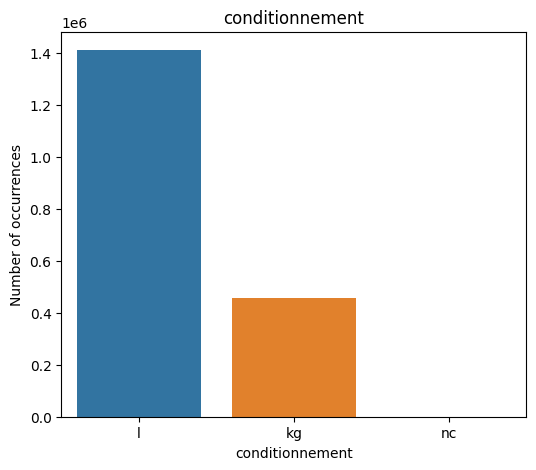

In [34]:
print("Valeurs possible de cette variable: ",
      df_produit['conditionnement'].unique())
hist_distrib_cat(df_produit, 'conditionnement')

Cette variable semble correspondre à sa description.

**eaj**

A priori, les valeurs possibles pour cette variable sont: oui, non ou nc. Est ce le cas?

Valeurs possible de cette variable:  ['Non' 'Oui' 'nc']


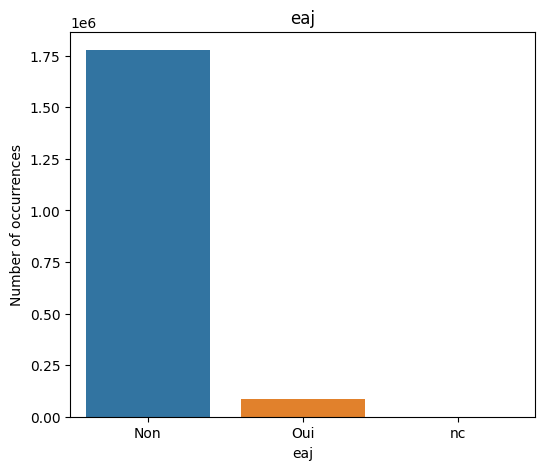

In [35]:
print("Valeurs possible de cette variable: ",
      df_produit['eaj'].unique())
hist_distrib_cat(df_produit, 'eaj')

Cette variable semble correspondre à sa description.

**achat_etranger**

Comme pour la variable eaj, les valeurs possibles sont: oui, non ou nc. Est ce le cas?

Valeurs possible de cette variable:  ['Non' 'Oui' 'nc']


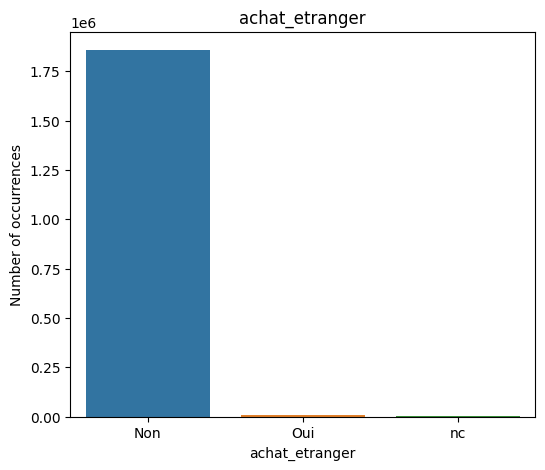

In [36]:
print("Valeurs possible de cette variable: ",
      df_produit['achat_etranger'].unique())
hist_distrib_cat(df_produit, 'achat_etranger')

Cette variable semble correspondre à sa description.

<code style="background:lightyellow;color:black">Retour au <a href="#C00">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C23">2.3. Exploration du dataframe concernant les substances</a></div>

**Information pertinente**: Pour les zones postales concernées par le traitement limitant l'identification des acheteurs, la valeur nc est attribuée aux champs amm, substance, cas, quantite_substance, classification, classification_mention, achat etranger. 

### <div class="alert alert-block alert-info"><a name="C231">2.3.1. Généralités</a></div>

In [4]:
# Afficher les premières lignes
df_substance.head()

annee  code_postal_acheteur      amm                    substance  \
0   2021                  1000  2000122                  metalaxyl-m   
1   2021                  1000  2000125  cuivre du sulfate de cuivre   
2   2021                  1000  2000201                   silthiofam   
3   2021                  1000  2000202                   glyphosate   
4   2021                  1000  2010531                    benoxacor   

           cas quantite_substance classification classification_mention  \
0   70630-17-0            0.03392          Autre                    NaN   
1    8011-63-0              11.62          Env A           Substitution   
2  175217-20-6               12.5          Env A                    NaN   
3    1071-83-6                7.2          Env A                    NaN   
4   98730-04-2              0.225          Autre                    NaN   

  achat_etranger  
0            Non  
1            Non  
2            Non  
3            Non  
4            Non

In [38]:
# Connaitre la taille
print("Le jeu de données sur les substances se compose de",
      df_substance.shape[0], "lignes et",
      df_substance.shape[1], "colonnes.")

Le jeu de données sur les substances se compose de 2684422 lignes et 9 colonnes.


Le jeu de données sur les substances se compose de 9 colonnes qui sont:
- 0/ annee: pour l'année d'achat de la substance
- 1/ code_postal_acheteur
- 2/ amm: numéro d'autorisation de mise sur le marché du produit incluant la substance
- 3/ substance: libellé de la substance active contenue dans le PPP
- 4/ cas: numéro CAS de la substance active contenue dans le PPP
- 5/ quantite_substance: quantité de substance active achetée exprimée en Kg avec un nombre variable de chiffres significatifs
- 6/ clasification: classement de la substance en vigueur l'année d'achat considérée au tritre de la redevance pour pollution diffuse. Un changement de nomenclature est à prendre en considération à partir de 2019.
- 7/ classification_mention: mention éventuelle associée au classement de la subsstance en vigueur l'année de l'achatconsidérée au tritre de la redevance pour pollution diffuse.
- 8/ achat_etranger: indicateur oui/non d'une quantité incluant ou non des achats effectués auprès de distributeurs établis à l'étranger

In [39]:
# Afficher les informations sur le jeu de données
df_substance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2684422 entries, 0 to 2684421
Data columns (total 9 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   annee                   int64 
 1   code_postal_acheteur    int64 
 2   amm                     object
 3   substance               object
 4   cas                     object
 5   quantite_substance      object
 6   classification          object
 7   classification_mention  object
 8   achat_etranger          object
dtypes: int64(2), object(7)
memory usage: 184.3+ MB


On peut observer que des valeurs sont manquantes pour certaines variables.

<Axes: >

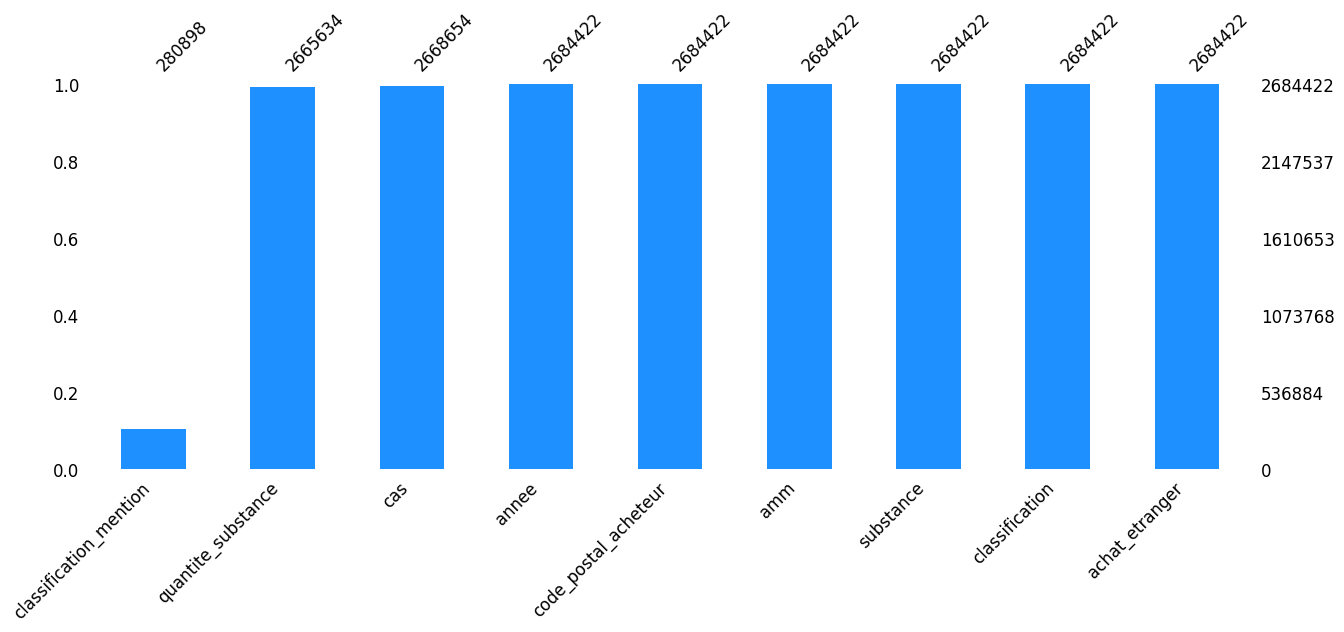

In [40]:
# Graph pour représenter les valeurs manquantes
msno.bar(df_substance,
         color="dodgerblue",
         sort="ascending",
         figsize=(15, 5),
         fontsize=12
         )

Des valeurs sont manquantes pour 3 variables:
- cas
- quantité de substance
- classification_mention

Elles seront étudiées lors de l'exploration de chaque variable.

In [41]:
# Vérifier la présence de valeurs dupliquées
print("Nombre de valeurs dupliquées:", df_substance.duplicated().sum())

Nombre de valeurs dupliquées: 1342211


<code style="background:lightyellow;color:black">Retour au <a href="#C00">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C232">2.3.2. Exploration des variables</a></div>

**annee**

In [42]:
# Quelles sont les valeurs possibles de cette variables?
df_substance['annee'].unique()

array([2021], dtype=int64)

Comme pour le jeu de données sur les produits, cette variable ne contient que la valeur 2021. Comme l'objectif de ce projet est de créer un jeu de données comportant les données sur plusieurs années, je choisi de garder cette variable.

**code_postal_acheteur**

In [43]:
# Connaitre le nombre de valeur unique
list_cp_substance = df_substance['code_postal_acheteur'].unique()
nb_cp_substance = len(list_cp_substance)
print("Nombre de codes postaux présents dans le dataframe", nb_cp_substance)

Nombre de codes postaux présents dans le dataframe 5948


Il y a le même nombre de codes postaux dans les deux jeux de données. Est-ce que ce sont les mêmes codes postaux?

In [44]:
cp_uniquement_substance = []
cp_produit_and_substance = []

list_cp_produit.sort()
list_cp_substance.sort()

for i in range(len(list_cp_substance)):
    if list_cp_substance[i] not in list_cp_produit:
        cp_uniquement_substance.append(list_cp_substance[i])
    else:
        cp_produit_and_substance.append(list_cp_substance[i])

if len(cp_uniquement_substance) == 0:
    print("Tout les codes postaux sont également dans le jeu de données sur les produits")
else:
    print("{nb} codes postaux officiels sont présents".format(nb=len(cp_produit_and_substance)))
    print("{nb} codes postaux non officiels sont présents".format(nb=len(cp_uniquement_substance)))

Tout les codes postaux sont également dans le jeu de données sur les produits


In [45]:
# Connaître le nombre de lignes concernées par un code postal = 0
lignes_cp_non_officiel = df_substance.loc[df_substance['code_postal_acheteur'] == cp_non_officiel[0]]
print("Nombre de lignes concernées: ", lignes_cp_non_officiel.shape[0],
      "soit", (lignes_cp_non_officiel.shape[0] *100) / df_substance.shape[0], "%")

Nombre de lignes concernées:  3422 soit 0.12747623138239814 %


In [46]:
# Connaitre la quantite de produit totale
df_tmp = df_substance.loc[df_substance['quantite_substance'] != 'nc']
quantite_substance_total = df_tmp['quantite_substance'].astype(float).sum()

# Connaitre la quantite de produit sans code postal
quantite_substance_non_officiel = lignes_cp_non_officiel['quantite_substance'].astype(float).sum()

print("Quantité de susbtance total: ", quantite_substance_total)
print("Quantité de substance sans code postal: ",
      quantite_substance_non_officiel,
      "soit ", (quantite_substance_non_officiel * 100) / quantite_substance_total,
      "%")

Quantité de susbtance total:  134648945.1847841
Quantité de substance sans code postal:  2116007.702228 soit  1.5714996499409024 %


**amm**

In [47]:
# Connaitre le nombre de valeur unique
list_amm_substance = df_substance['amm'].unique()
nb_amm_substance = len(list_amm_substance)
print("Nombre de numéro amm présents dans le dataframe", nb_amm_substance)

Nombre de numéro amm présents dans le dataframe 4199


Il y a moins de numéro d'amm que dans le jeu de données sur les produits. 

**substance**

In [5]:
# Nombre de substances différentes dans le jeu de données
df_substance['substance'].nunique()

478

Il y a 478 substances différentes dans le jeu de données.

**cas**

In [49]:
# Nombre de numéro cas différents dans le jeu de données
df_substance['cas'].nunique()

410

Il y a une différence entre le nombre de substance et le nombre de numéro cas de 68. Cela peut-il s'expliquer par les valeurs manquantes de la variable 'cas'?

In [50]:
# Isolation des lignes avec des valeurs 'cas' manquantes.
df_cas = df_substance.loc[df_substance['cas'].isnull()]
df_cas.head()

annee  code_postal_acheteur      amm  \
125   2021                  1000  2180275   
137   2021                  1000  2190346   
443   2021                  1090  2190346   
594   2021                  1100  2180275   
600   2021                  1100  2190346   

                                           substance  cas quantite_substance  \
125                                       cerevisane  NaN            0.02823   
137  bacillus amyloliquefaciens subsp plantarum d747  NaN                NaN   
443  bacillus amyloliquefaciens subsp plantarum d747  NaN                NaN   
594                                       cerevisane  NaN            0.04705   
600  bacillus amyloliquefaciens subsp plantarum d747  NaN                NaN   

    classification classification_mention achat_etranger  
125          Autre                    NaN            Non  
137          Autre                    NaN            Non  
443          Autre                    NaN            Non  
594          Autre                    NaN            Non  
600          Autre                    NaN            Non

En observant les premières lignes du jeu de données des valeurs manquantes cas, il apparait que le nom de la substance et le numéro d'amm peuvent apparaitre plusieurs fois

In [51]:
# Connaitre la taille de ce dataframe
print("Nombre de valeurs 'cas' manquantes: ", df_cas.shape[0])

# Connaitre le nombre de substance sans CAS
print("Nombre substance sans cas: ", df_cas['substance'].nunique())
df_cas['substance'].unique()

Nombre de valeurs 'cas' manquantes:  15768
Nombre substance sans cas:  44


array(['cerevisane', 'bacillus amyloliquefaciens subsp plantarum d747',
       'cydia pomonella granulosis, isolat m (cpvg m)',
       'trichogramma brassicae', 'trichoderma atroviride souche l-1237',
       'streptomyces k61 (anciennement streptomyces griseoviridis)',
       'cos-oga', 'huile vegetale', 'trichoderma harzianum souche t22',
       'cydia pomonella granulovirus, isolat r5 (cpgv-r5)',
       'coniothyrium minitans souche con/m/91-08', 'farine de sang',
       'graisse de mouton', 'huile de poisson',
       'paecilomyces lilacinus souche 251', 'trichoderma asperellum tv1',
       'bacillus pumilus souche qst 2808', 'cydia pomonella granulovirus',
       'clonostachys rosea j1446 (anciennement gliocladium catenulatum)',
       'saccharomyces cerevisiae souche las02', 'kieselguhr',
       'hydrolysat de proteines', 'trichoderma atroviride souche sc1',
       'extrait de bois de quassia (variete picrasma)', 'poivre',
       "cire d'abeille", 'trichoderma asperellum icc012',
 

Il manque le numero cas pour 44 substances.
Après quelques recherches, ces substances ne semblent pas nécessiter de numéro cas.

Comment expliquer la différence entre le nombre de substances et le nombre de numéro cas car il reste une différence de 24 entre ces deux nombres. Un même numéro de cas peut-il correspondre à une substance ayant des noms différents?

In [52]:
df_tmp = df_substance[['cas', 'substance', 'amm']].loc[df_substance['cas'].notna()]

In [53]:
df_agg = df_tmp.groupby(['cas','substance']).count().reset_index()
df_agg.head()

cas           substance    amm
0    10004-44-1           hymexazol   2834
1    10022-31-8   nitrate de baryum    196
2  1003318-67-9    oxathiapiproline   3720
3    10045-86-0  phosphate ferrique  25516
4   100646-51-3  quizalofop-p-ethyl   7886

In [54]:
df_agg2 = df_agg.groupby("cas", as_index=False).count()

df_agg2.head()

cas  substance  amm
0    10004-44-1          1    1
1    10022-31-8          1    1
2  1003318-67-9          1    1
3    10045-86-0          1    1
4   100646-51-3          1    1

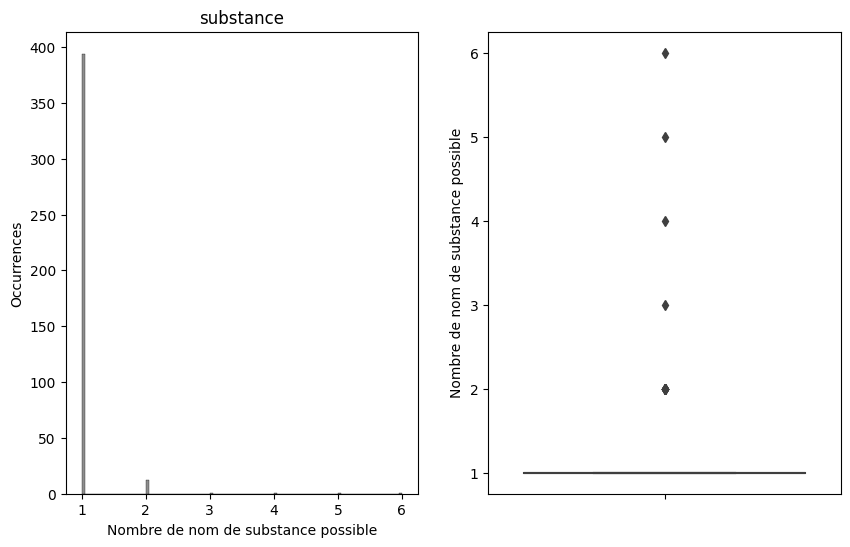

In [55]:
hist_distrib(df_agg2,
             variable='substance',
             unit_label='Nombre de nom de substance possible')

Un même numéro de cas peut correspondre à différents noms de produits (jusqu'à 6 noms différents).
Quels sont les numéros de cas associés à plusieurs nom?

In [56]:
cas_pls_noms = df_agg2.loc[df_agg2['substance'] > 1]
cas_pls_noms

cas  substance  amm
183   2372-82-9          2    2
240  52315-07-8          2    2
265     61-82-5          2    2
270  61827-42-7          2    2
273  63428-82-0          3    3
275     64-17-5          2    2
297  68038-70-0          2    2
298  68038-71-1          6    6
302  68424-85-1          2    2
313   7173-51-5          2    2
327   7704-34-9          5    5
342   8003-34-7          2    2
351   8042-47-5          4    4
352   8050-09-7          2    2
379   9006-42-2          2    2
408          NC          2    2

In [53]:
df_agg.loc[df_agg['cas'] == '68038-71-1']

cas                                          substance   amm
306  68038-71-1              bacillus thuringiensis serotype 3a 3b    43
307  68038-71-1             bacillus thuringiensis sp. tenebrionis     7
308  68038-71-1  bacillus thuringiensis ssp aizawai souche abts...   351
309  68038-71-1  bacillus thuringiensis ssp kurstaki souche abt...  2386
310  68038-71-1  bacillus thuringiensis ssp kurstaki souche eg ...    89
311  68038-71-1   bacillus thuringiensis ssp kurstaki souche sa-11  1662

Pour ce numéro de cas, différents noms de substance sont présent mais très similaires.

**quantite_substance**

Elle est format objet. Est ce parce qu'elle contient des valeurs nc?

In [54]:
df_tmp = df_substance.loc[df_substance['quantite_substance'] == 'nc']
print("Nombre de lignes sans quantité communiquée: ", df_tmp.shape[0])

Nombre de lignes sans quantité communiquée:  221


Des valeurs 'nc' sont également pour ce jeu de données.

In [55]:
# Nombre de valeurs manquantes
df_tmp = df_substance.loc[df_substance['quantite_substance'].isna()]
print("Nombre de valeurs manquantes: ", df_tmp.shape[0])

Nombre de valeurs manquantes:  9394


**classification**

Comme ce jeu de données concerne l'année 2021, la classification se fait selon les catégories: CMR, Santé A, Env A, Env B, autre et nc. Retrouve-t-on bien uniquement ces catégories dans le jeu de données?

Valeurs possible de cette variable:  ['Autre' 'Env A' 'Santé A' 'CMR' 'Env B' 'nc']


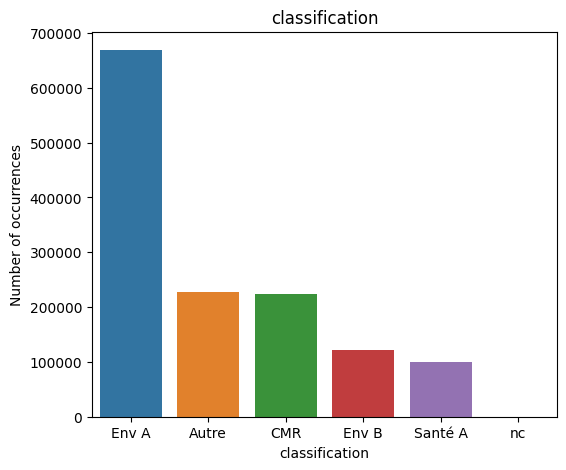

In [56]:
print("Valeurs possible de cette variable: ",
      df_substance['classification'].unique())
hist_distrib_cat(df_substance, 'classification')

Cette variable semble correspondre à sa description.

**classification_mention**

D'après les métadonnées, cette variable peut prendre les valeurs: Exclusion, Substitution ou nc. Est-ce le cas?

Valeurs possible de cette variable:  [nan 'Substitution' 'Exclusion' 'nc']


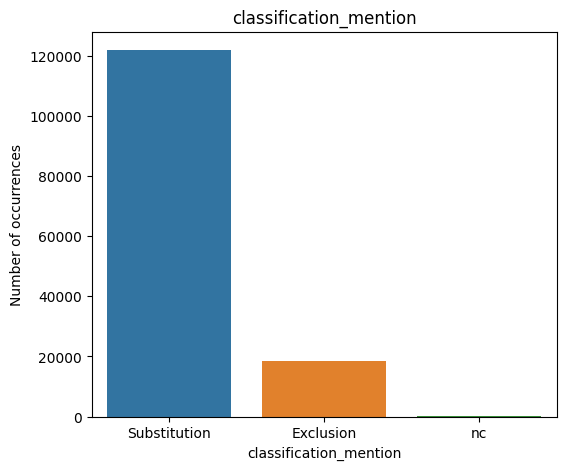

In [57]:
print("Valeurs possible de cette variable: ",
      df_substance['classification_mention'].unique())
hist_distrib_cat(df_substance, 'classification_mention')

Cette variable semble correspondre à sa description.

**achat_etranger**

D'après les métadonnées, les valeurs possibles sont: oui, non ou nc. Est ce le cas?

Valeurs possible de cette variable:  ['Non' 'Oui' 'nc']


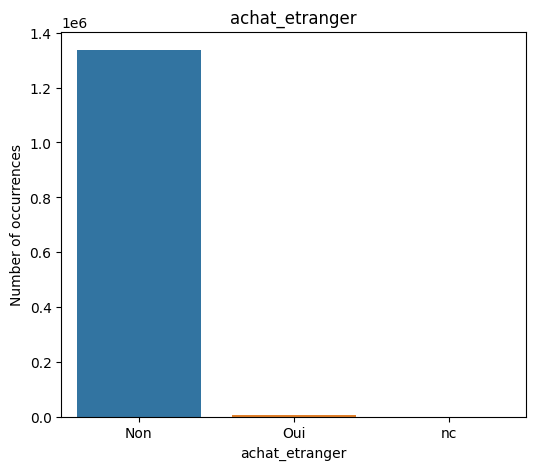

In [58]:
print("Valeurs possible de cette variable: ",
      df_substance['achat_etranger'].unique())
hist_distrib_cat(df_substance, 'achat_etranger')

Cette variable semble correspondre à sa description.

**Exemple du glyphosate**

In [6]:
df_glyphosate = df_substance.loc[df_substance["substance"] == "glyphosate"]
df_glyphosate.head()

annee  code_postal_acheteur      amm   substance        cas  \
3    2021                  1000  2000202  glyphosate  1071-83-6   
23   2021                  1000  2080105  glyphosate  1071-83-6   
33   2021                  1000  2090093  glyphosate  1071-83-6   
40   2021                  1000  2090188  glyphosate  1071-83-6   
54   2021                  1000  2100206  glyphosate  1071-83-6   

   quantite_substance classification classification_mention achat_etranger  
3                 7.2          Env A                    NaN            Non  
23                7.2          Env A                    NaN            Non  
33                 90          Env A                    NaN            Non  
40                 36          Env A                    NaN            Non  
54               97.2          Env A                    NaN            Non

In [7]:
df_glyphosate["cas"].unique()

array(['1071-83-6'], dtype=object)

In [8]:
df_glyphosate2 = df_substance.loc[df_substance["cas"] == '1071-83-6']
df_glyphosate2.head()

annee  code_postal_acheteur      amm   substance        cas  \
3    2021                  1000  2000202  glyphosate  1071-83-6   
23   2021                  1000  2080105  glyphosate  1071-83-6   
33   2021                  1000  2090093  glyphosate  1071-83-6   
40   2021                  1000  2090188  glyphosate  1071-83-6   
54   2021                  1000  2100206  glyphosate  1071-83-6   

   quantite_substance classification classification_mention achat_etranger  
3                 7.2          Env A                    NaN            Non  
23                7.2          Env A                    NaN            Non  
33                 90          Env A                    NaN            Non  
40                 36          Env A                    NaN            Non  
54               97.2          Env A                    NaN            Non

In [9]:
df_glyphosate2["substance"].unique()

array(['glyphosate'], dtype=object)

<code style="background:lightyellow;color:black">Retour au <a href="#C00">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C24">2.4. Comparaison df_produit vs df_substance</a></div>

Est-ce bien les mêmes codes postaux qui sont présent dans les deux jeux de données?

In [59]:
# Ordonner les deux listes pour pouvoir les comparer
list_cp_produit.sort()
list_cp_substance.sort()

# Comparaison des deux listes ordonnées
if np.array_equal(list_cp_produit, list_cp_substance):
    print("Les mêmes codes postaux sont présents dans les deux jeux de données")
else:
    print("Il y a des différences")

Les mêmes codes postaux sont présents dans les deux jeux de données


Dans ces deux jeux de données, est ce qu'un même numéro amm peut être associé plusieurs fois au même code postal?

In [60]:
produit_agg_amm = df_produit.groupby(['amm', 'code_postal_acheteur'], as_index=False).count()

produit_agg_amm.head()

amm  code_postal_acheteur  annee  quantite_produit  conditionnement  \
0  1030003                  4180      1                 1                1   
1  1030003                  4290      1                 1                1   
2  1030003                  4700      1                 1                1   
3  1030003                  6130      1                 1                1   
4  1030003                  6140      1                 1                1   

   eaj  achat_etranger  
0    1               1  
1    1               1  
2    1               1  
3    1               1  
4    1               1

In [61]:
produit_agg_amm['annee'].describe()

count    932731.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: annee, dtype: float64

Un même numéro amm ne peut être associé qu'une seule fois à un même code postal.

In [62]:
substance_agg_amm = df_substance.groupby(['amm', 'code_postal_acheteur'], as_index=False).count()

substance_agg_amm.head()

amm  code_postal_acheteur  annee  substance  cas  quantite_substance  \
0  1030003                     0      1          1    1                   1   
1  1030003                 11300      1          1    1                   1   
2  1030003                 12550      1          1    1                   1   
3  1030003                 30127      1          1    1                   1   
4  1030003                 30128      1          1    1                   1   

   classification  classification_mention  achat_etranger  
0               1                       0               1  
1               1                       0               1  
2               1                       0               1  
3               1                       0               1  
4               1                       0               1

In [63]:
substance_agg_amm['annee'].describe()

count    932731.000000
mean          1.439012
std           0.665694
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: annee, dtype: float64

Dans le jeu de données concernant les substances, un même numéro d'amm est associé plusieurs fois au même code postal. Ceci semble cohérent puisque plusieurs substances d'un produit peuvent être répertorié sous le même numéro d'amm.

Est ce que les associations amm - code postal sont les mêmes dans les deux jeux de données? 

In [64]:
produit_agg_amm['association'] = (produit_agg_amm['amm'].map(str)
                                  +" - " 
                                  + produit_agg_amm['code_postal_acheteur'].map(str))
produit_agg_amm['association']

0         1030003 - 4180
1         1030003 - 4290
2         1030003 - 4700
3         1030003 - 6130
4         1030003 - 6140
               ...      
932726        nc - 95670
932727        nc - 95680
932728        nc - 95820
932729        nc - 97300
932730        nc - 97352
Name: association, Length: 932731, dtype: object

In [65]:
substance_agg_amm['association'] = (substance_agg_amm['amm'].map(str)
                                    +" - " 
                                    + substance_agg_amm['code_postal_acheteur'].map(str))
substance_agg_amm['association']

0             1030003 - 0
1         1030003 - 11300
2         1030003 - 12550
3         1030003 - 30127
4         1030003 - 30128
               ...       
932726         nc - 95670
932727         nc - 95680
932728         nc - 95820
932729         nc - 97300
932730         nc - 97352
Name: association, Length: 932731, dtype: object

In [66]:
list_ass_substance = substance_agg_amm['association'].sort_values().tolist()

results = produit_agg_amm['association'].isin(list_ass_substance)
results.value_counts()

True    932731
Name: association, dtype: int64

In [67]:
list_ass_produit = produit_agg_amm['association'].sort_values().tolist()

results = substance_agg_amm['association'].isin(list_ass_produit)
results.value_counts()

True    932731
Name: association, dtype: int64

Il y a une cohérence entre les associations 'amm - code postal acheteur' des données sur les produits et les substances.

<code style="background:lightyellow;color:black">Retour au <a href="#C00">Sommaire</a></code>

# <div class="alert alert-block alert-info"><a name="C3">3. Ramener les codes postaux en commune</a></div>


<code style="background:lightyellow;color:black">Retour au <a href="#C00">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C31">3.1. Créer un jeu de données avec les codes insee des communes à jour</a></div>

In [68]:
df_commune_nouvelle = pd.read_csv('C:/Users/virgi/Nextcloud/ThinkBio/data/laposte_commnouv.csv',
                                  delimiter=';')
df_commune_nouvelle.head()

Code INSEE Commune Nouvelle Nom Commune Nouvelle Siège  \
0     AVRIL 2016                        39378     Trois Châteaux (Les) *   
1     AVRIL 2016                        39378     Trois Châteaux (Les) *   
2  DÉCEMBRE 2016                        12021            Bas Ségala (Le)   
3  DÉCEMBRE 2016                        14011                 Aurseulles   
4  DÉCEMBRE 2016                        14172                     Saline   

   Code INSEE Commune Déléguée (non actif)   Nom Commune Déléguée  \
0                                  39023.0           Aubépin (L')   
1                                  39378.0   Nanc-lès-Saint-Amour   
2                                  12285.0            Vabre-Tizac   
3                                  14581.0  Saint-Germain-d'Ectot   
4                                  14666.0            Sannerville   

   Adresse 2016 - Code INSEE  Adresse 2016 - L6 Code Postal  \
0                        NaN                            NaN   
1                        NaN                            NaN   
2                    12021.0                        12240.0   
3                    14011.0                        14240.0   
4                    14172.0                        14940.0   

  Adresse 2016 - L6 Libellé Acheminement  \
0                     LES TROIS CHATEAUX   
1                     LES TROIS CHATEAUX   
2                          LE BAS SEGALA   
3                             AURSEULLES   
4                                 SALINE   

  Adresse 2016 - Ligne 5 Commune déléguée  \
0                               L AUBEPIN   
1                       NANC LES ST AMOUR   
2                             VABRE TIZAC   
3                      ST GERMAIN D ECTOT   
4                             SANNERVILLE   

   Adresse 2016 - Code INSEE associé à la L5  Adresse 2015 - Code INSEE  \
0                                        NaN                        NaN   
1                                        NaN                        NaN   
2                                    12285.0                    12285.0   
3                                    14581.0                    14581.0   
4                                    14666.0                    14666.0   

   Adresse 2015 - L6 Code Postal Adresse 2015 - Libellé Acheminement  \
0                            NaN                           L AUBEPIN   
1                            NaN                   NANC LES ST AMOUR   
2                        12240.0                         VABRE TIZAC   
3                        14240.0                  ST GERMAIN D ECTOT   
4                        14940.0                         SANNERVILLE   

  Adresse 2015 - L5  Adresse 2015 - Code INSEE Associé à la L5  
0               NaN                                        NaN  
1               NaN                                        NaN  
2               NaN                                        NaN  
3               NaN                                        NaN  
4               NaN                                        NaN

In [69]:
df_commune_nouvelle.tail()

Code INSEE Commune Nouvelle Nom Commune Nouvelle Siège  \
2824  JANVIER 2022                        56213    Saint-Gérand-Croixanvec   
2825  JANVIER 2023                         1138                 Culoz-Béon   
2826  JANVIER 2023                        16206       Mansle-les-Fontaines   
2827  JANVIER 2023                        51457         Coeur-de-la-Vallée   
2828  JANVIER 2023                        85289                     Terval   

      Code INSEE Commune Déléguée (non actif) Nom Commune Déléguée  \
2824                                  56213.0         Saint-Gérand   
2825                                   1039.0                 Béon   
2826                                  16206.0               Mansle   
2827                                  51063.0   Binson-et-Orquigny   
2828                                  85037.0        Breuil-Barret   

      Adresse 2016 - Code INSEE  Adresse 2016 - L6 Code Postal  \
2824                        NaN                            NaN   
2825                        NaN                            NaN   
2826                        NaN                            NaN   
2827                        NaN                            NaN   
2828                        NaN                            NaN   

     Adresse 2016 - L6 Libellé Acheminement  \
2824                SAINT GERAND CROIXANVEC   
2825                             CULOZ BEON   
2826                   MANSLE LES FONTAINES   
2827                      CŒUR DE LA VALLEE   
2828                                 TERVAL   

     Adresse 2016 - Ligne 5 Commune déléguée  \
2824                            SAINT GERAND   
2825                                    BEON   
2826                                  MANSLE   
2827                      BINSON ET ORQUIGNY   
2828                           BREUIL BARRET   

      Adresse 2016 - Code INSEE associé à la L5  Adresse 2015 - Code INSEE  \
2824                                        NaN                        NaN   
2825                                        NaN                        NaN   
2826                                        NaN                        NaN   
2827                                        NaN                        NaN   
2828                                        NaN                        NaN   

      Adresse 2015 - L6 Code Postal Adresse 2015 - Libellé Acheminement  \
2824                            NaN                        SAINT GERAND   
2825                            NaN                                BEON   
2826                            NaN                              MANSLE   
2827                            NaN                  BINSON ET ORQUIGNY   
2828                            NaN                       BREUIL BARRET   

     Adresse 2015 - L5  Adresse 2015 - Code INSEE Associé à la L5  
2824               NaN                                        NaN  
2825               NaN                                        NaN  
2826               NaN                                        NaN  
2827               NaN                                        NaN  
2828               NaN                                        NaN

In [70]:
df_commune_nouvelle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0                                              2829 non-null   object 
 1   Code INSEE Commune Nouvelle                2829 non-null   int64  
 2   Nom Commune Nouvelle Siège                 2829 non-null   object 
 3   Code INSEE Commune Déléguée (non actif)    2529 non-null   float64
 4   Nom Commune Déléguée                       2827 non-null   object 
 5   Adresse 2016 - Code INSEE                  378 non-null    float64
 6   Adresse 2016 - L6 Code Postal              378 non-null    float64
 7   Adresse 2016 - L6 Libellé Acheminement     2824 non-null   object 
 8   Adresse 2016 - Ligne 5 Commune déléguée    2675 non-null   object 
 9   Adresse 2016 - Code INSEE associé à la L5  273 non-null    float64
 10  Adresse 2015 - Code INSE

In [71]:
df_commune_nouvelle.dropna(subset=["Code INSEE Commune Déléguée (non actif)"], inplace=True)

<code style="background:lightyellow;color:black">Retour au <a href="#C00">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C32">3.2. Préparer un jeu de données avec les superficies agricoles de chaque commune</a></div>

Les données concernant les superficies agricoles ont été téléchargé depuis le site Corine Land cover (https://www.statistiques.developpement-durable.gouv.fr/corine-land-cover-0). Ici, les données en 5 catégories ont été utilisé pour la métropole et des TOM.

In [72]:
df_superficie_metropole = pd.read_csv('C:/Users/virgi/Nextcloud/ThinkBio/data/clc_etat_com_n1.csv',
                   delimiter=';',
                   low_memory=False)
df_superficie_metropole.head()

Code_commune_insee  Annee Base_de_donnees  \
0              01001   1990        CLC 1990   
1              01002   1990        CLC 1990   
2              01004   1990        CLC 1990   
3              01005   1990        CLC 1990   
4              01006   1990        CLC 1990   

   Superficie_territoires_artificialises  Superficie_Territoires_agricoles  \
0                              62.289977                       1127.572271   
1                               0.000000                        321.820765   
2                             700.507290                        541.599039   
3                             112.495907                       1251.849494   
4                              33.099297                        124.659585   

   Superficie_Forets_et_milieux_semi_naturels  Superficie_zones_humides  \
0                                  375.612252                       0.0   
1                                  591.172335                       0.0   
2                                 1206.753620                       0.0   
3                                   55.273850                       0.0   
4                                  444.888768                       0.0   

   Superficie_surfaces_en_eau  
0                    0.000000  
1                    0.000000  
2                    0.000000  
3                  185.437198  
4                    0.000000

In [73]:
# Garder uniquement les données les plus récentes
df_superficie_metropole = df_superficie_metropole.loc[df_superficie_metropole['Annee'] == 2018]
df_superficie_metropole.drop(["Annee",
                              "Base_de_donnees",
                              "Superficie_territoires_artificialises",
                              "Superficie_Forets_et_milieux_semi_naturels",
                              "Superficie_zones_humides",
                              "Superficie_surfaces_en_eau"],
                              axis=1,
                              inplace=True)
df_superficie_metropole.head()

Code_commune_insee  Superficie_Territoires_agricoles
250292              01001                       1131.276099
250293              01002                        321.820765
250294              01004                        377.808737
250295              01005                       1256.275286
250296              01006                        124.659585

In [74]:
df_superficie_tom = pd.read_csv('C:/Users/virgi/Nextcloud/ThinkBio/data/clcdom_etat_com_n1.csv',
                                delimiter=';',
                                low_memory=False)
df_superficie_tom.head()

Code_commune_insee  Annee Base_de_donnees  \
0               97101   2000        CLC 2000   
1               97102   2000        CLC 2000   
2               97103   2000        CLC 2000   
3               97104   2000        CLC 2000   
4               97105   2000        CLC 2000   

   Superficie_territoires_artificialises  Superficie_Territoires_agricoles  \
0                            2280.461157                       3443.288186   
1                             340.369553                       3465.289977   
2                            1672.353771                       2104.752215   
3                             274.075377                        861.107218   
4                             366.999359                         44.617405   

   Superficie_Forets_et_milieux_semi_naturels  Superficie_zones_humides  \
0                                 1117.240115                143.678800   
1                                 2583.708752                  6.482981   
2                                  840.372243                 33.507517   
3                                 1287.350805                  0.000000   
4                                   31.575754                  0.000000   

   Superficie_surfaces_en_eau  Pas_de_donnee  
0                   17.857993            0.0  
1                   12.639987            0.0  
2                    3.292804            0.0  
3                    0.000000            0.0  
4                    0.009433            0.0

In [75]:
# Garder uniquement les données les plus récentes
df_superficie_tom = df_superficie_tom.loc[df_superficie_tom['Annee'] == 2018]
df_superficie_tom.drop(["Annee",
                       "Base_de_donnees",
                       "Superficie_territoires_artificialises",
                       "Superficie_Forets_et_milieux_semi_naturels",
                       "Superficie_zones_humides",
                       "Superficie_surfaces_en_eau",
                       "Pas_de_donnee"],
                       axis=1,
                       inplace=True)
df_superficie_tom.head()

Code_commune_insee  Superficie_Territoires_agricoles
611               97101                       3178.231570
612               97102                       3798.998945
613               97103                       1885.053317
614               97104                        743.610305
615               97105                         50.522977

In [76]:
df_superficie = pd.concat([df_superficie_metropole,
                           df_superficie_tom],
                           ignore_index=True)
df_superficie = df_superficie.round(2)
df_superficie.head()

Code_commune_insee  Superficie_Territoires_agricoles
0              01001                           1131.28
1              01002                            321.82
2              01004                            377.81
3              01005                           1256.28
4              01006                            124.66

In [77]:
# Connaitre la taille
print("Le jeu de données se compose de",
      df_superficie.shape[0], "lignes et",
      df_superficie.shape[1], "colonnes.")

Le jeu de données se compose de 35885 lignes et 2 colonnes.


<code style="background:lightyellow;color:black">Retour au <a href="#C00">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C33">3.3. Lier code postal, code insee de la commune et superficie agricole</a></div>

In [78]:
df_code_insee = pd.merge(df_cp,
                         df_superficie,
                         how='left',
                         left_on="code_commune_insee",
                         right_on="Code_commune_insee")
df_code_insee.head()

code_commune_insee nom_de_la_commune  code_postal coordonnees_geographiques  \
0              12101           FLAGNAC        12300  44.593404602,2.264840963   
1              12116          HUPARLAC        12460  44.711087639,2.753632775   
2              12143          MELAGUES        12360  43.727854164,3.016705208   
3              12147         MONTAGNOL        12360  43.831393077,3.024302478   
4              12154          MONTLAUR        12400  43.865349416,2.833674997   

  Code_commune_insee  Superficie_Territoires_agricoles  
0              12101                            564.16  
1              12116                           2149.18  
2              12143                            528.50  
3              12147                           1285.32  
4              12154                           3568.69

In [79]:
# Connaitre la taille
print("Le jeu de données se compose de",
      df_code_insee.shape[0], "lignes et",
      df_code_insee.shape[1], "colonnes.")

Le jeu de données se compose de 35579 lignes et 6 colonnes.


In [80]:
# Supprimer les colonnes inutiles
df_code_insee.drop(columns=['Code_commune_insee'], inplace=True)

In [81]:
# Savoir si un code commune insee peut être associé à plusieurs codes postaux 
df_verif = df_code_insee[['code_postal', 'code_commune_insee']].groupby('code_commune_insee',
                                                                        as_index=False).count()

df_verif['code_postal'].unique()

array([1, 2, 4, 5, 3, 6], dtype=int64)

<Axes: >

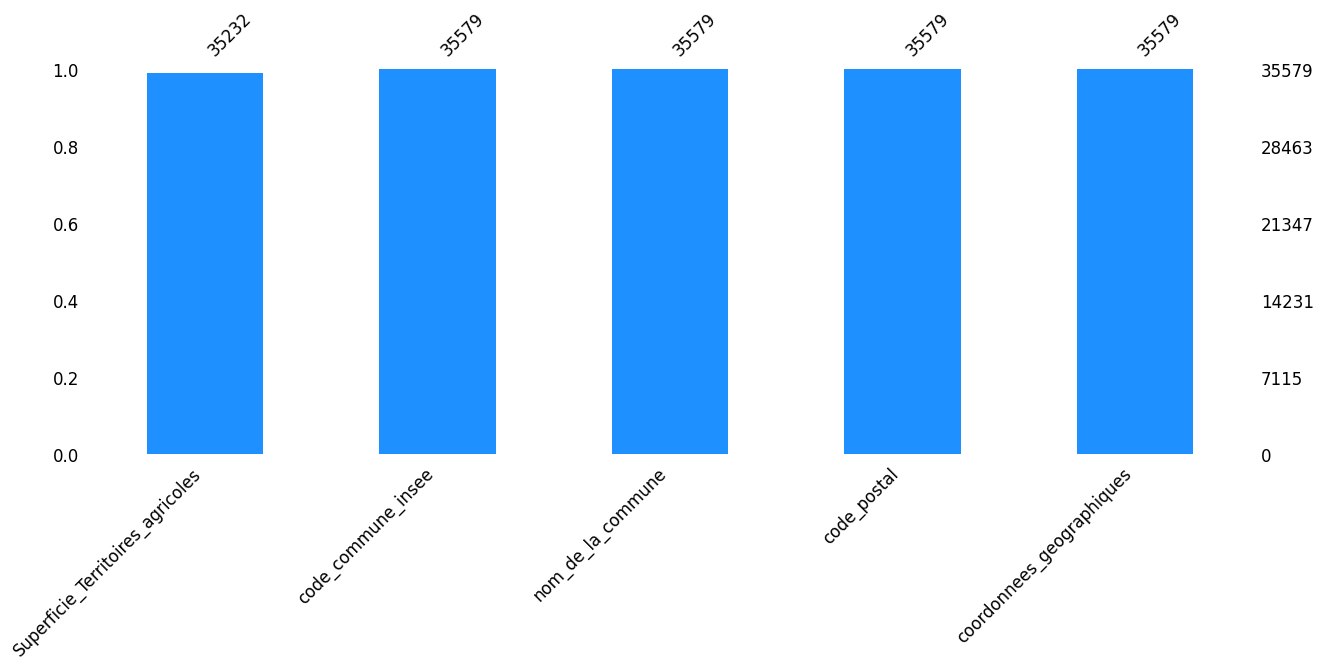

In [82]:
# Graph pour représenter les valeurs manquantes
msno.bar(df_code_insee,
         color="dodgerblue",
         sort="ascending",
         figsize=(15, 5),
         fontsize=12
         )

La commune de St Lucien n'existe en tant que telle que depuis 2017. Elle était jusqu'alors associée à Sigy-en-Bray. Pour notre porjet, je pense qu'il est plus pertinent de garder ces deux communes associées. Je choisie donc de supprimer la commune St Lucien du jeu de données des code postaux.

In [83]:
# Suppression de St Lucien
df_code_insee = df_code_insee.loc[df_code_insee['code_commune_insee'] != '76601']
df_code_insee.shape

(35578, 5)

<code style="background:lightyellow;color:black">Retour au <a href="#C00">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C34">3.4. Avoir la surface agricole par code postale</a></div>

In [84]:
df_code_postal = df_code_insee[['code_postal',
                                'code_commune_insee',
                                'Superficie_Territoires_agricoles']].groupby('code_postal',
                                                                             as_index=False).agg({"code_commune_insee": "count",
                                                                                                  "Superficie_Territoires_agricoles": "sum"})

df_code_postal.columns = ['code_postal',
                          'Nombre_commune_par_code_postal',
                          'Superficie_agricole_par_code_postal']

df_code_postal.head()

code_postal  Nombre_commune_par_code_postal  \
0         1000                               2   
1         1090                               6   
2         1100                               7   
3         1110                               6   
4         1120                               7   

   Superficie_agricole_par_code_postal  
0                              1308.10  
1                              3220.15  
2                              1618.92  
3                              4694.43  
4                              5726.49

<Axes: >

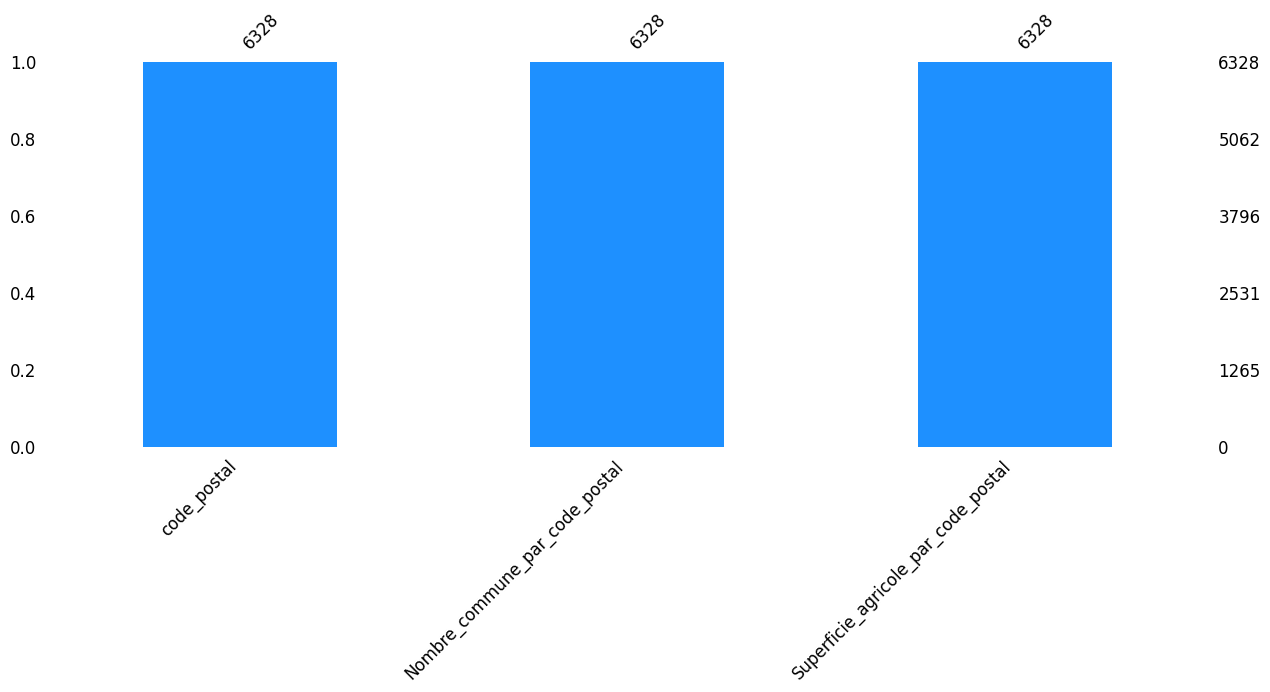

In [85]:
# Graph pour représenter les valeurs manquantes
msno.bar(df_code_postal,
         color="dodgerblue",
         sort="ascending",
         figsize=(15, 5),
         fontsize=12
         )

Création d'un dataframe avec les superficies agricoles par code postal et par code insee regroupées.

In [86]:
df_superficie_agricole = pd.merge(df_code_insee,
                                  df_code_postal,
                                  how='left',
                                  on='code_postal'
                                  )

# Connaitre la taille
print("Le jeu de données se compose de",
      df_superficie_agricole.shape[0], "lignes et",
      df_superficie_agricole.shape[1], "colonnes.")

df_superficie_agricole.head()

Le jeu de données se compose de 35578 lignes et 7 colonnes.


code_commune_insee nom_de_la_commune  code_postal coordonnees_geographiques  \
0              12101           FLAGNAC        12300  44.593404602,2.264840963   
1              12116          HUPARLAC        12460  44.711087639,2.753632775   
2              12143          MELAGUES        12360  43.727854164,3.016705208   
3              12147         MONTAGNOL        12360  43.831393077,3.024302478   
4              12154          MONTLAUR        12400  43.865349416,2.833674997   

   Superficie_Territoires_agricoles  Nombre_commune_par_code_postal  \
0                            564.16                               9   
1                           2149.18                               5   
2                            528.50                              10   
3                           1285.32                              10   
4                           3568.69                               9   

   Superficie_agricole_par_code_postal  
0                              6772.87  
1                              8472.56  
2                              9643.37  
3                              9643.37  
4                             19697.67

In [87]:
# Définir le répertoire où sauvegarder le jeu de données
# path_to_save = "C:/Users/virgi/Documents/ThinkBio/thinkbio/artifacts/"
path_to_save = "C:/Users/virgi/Nextcloud/ThinkBio/data_crees/"

# Sauvegarde du jeu de données
df_superficie_agricole.to_csv(path_to_save + "superficie_agricole_par_commune.csv", index=False)

<code style="background:lightyellow;color:black">Retour au <a href="#C00">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C35">3.5. Mettre Df_produit et df_substance à l'échelle de la commune</a></div>

**Pour df_produit**

In [88]:
# Ramener à l'échelle de la commune
df_produit_commune = pd.merge(df_produit,
                              df_superficie_agricole,
                              how='left',
                              left_on="code_postal_acheteur",
                              right_on='code_postal')

#Supprimer la colonne en double 
df_produit_commune.drop(columns=['code_postal'], inplace=True)

# Connaitre la taille
print("Le jeu de données se compose de",
      df_produit_commune.shape[0], "lignes et",
      df_produit_commune.shape[1], "colonnes.")

df_produit_commune.head()

Le jeu de données se compose de 8120413 lignes et 13 colonnes.


annee  code_postal_acheteur      amm quantite_produit conditionnement  eaj  \
0   2021                  1000  2000122              0.1               l  Non   
1   2021                  1000  2000122              0.1               l  Non   
2   2021                  1000  2000125             58.1              kg  Oui   
3   2021                  1000  2000125             58.1              kg  Oui   
4   2021                  1000  2000201              100               l  Non   

  achat_etranger code_commune_insee   nom_de_la_commune  \
0            Non              01053     BOURG EN BRESSE   
1            Non              01344  ST DENIS LES BOURG   
2            Non              01053     BOURG EN BRESSE   
3            Non              01344  ST DENIS LES BOURG   
4            Non              01053     BOURG EN BRESSE   

  coordonnees_geographiques  Superficie_Territoires_agricoles  \
0  46.205013838,5.245593605                            509.87   
1  46.211139007,5.184567751                            798.23   
2  46.205013838,5.245593605                            509.87   
3  46.211139007,5.184567751                            798.23   
4  46.205013838,5.245593605                            509.87   

   Nombre_commune_par_code_postal  Superficie_agricole_par_code_postal  
0                             2.0                               1308.1  
1                             2.0                               1308.1  
2                             2.0                               1308.1  
3                             2.0                               1308.1  
4                             2.0                               1308.1

<Axes: >

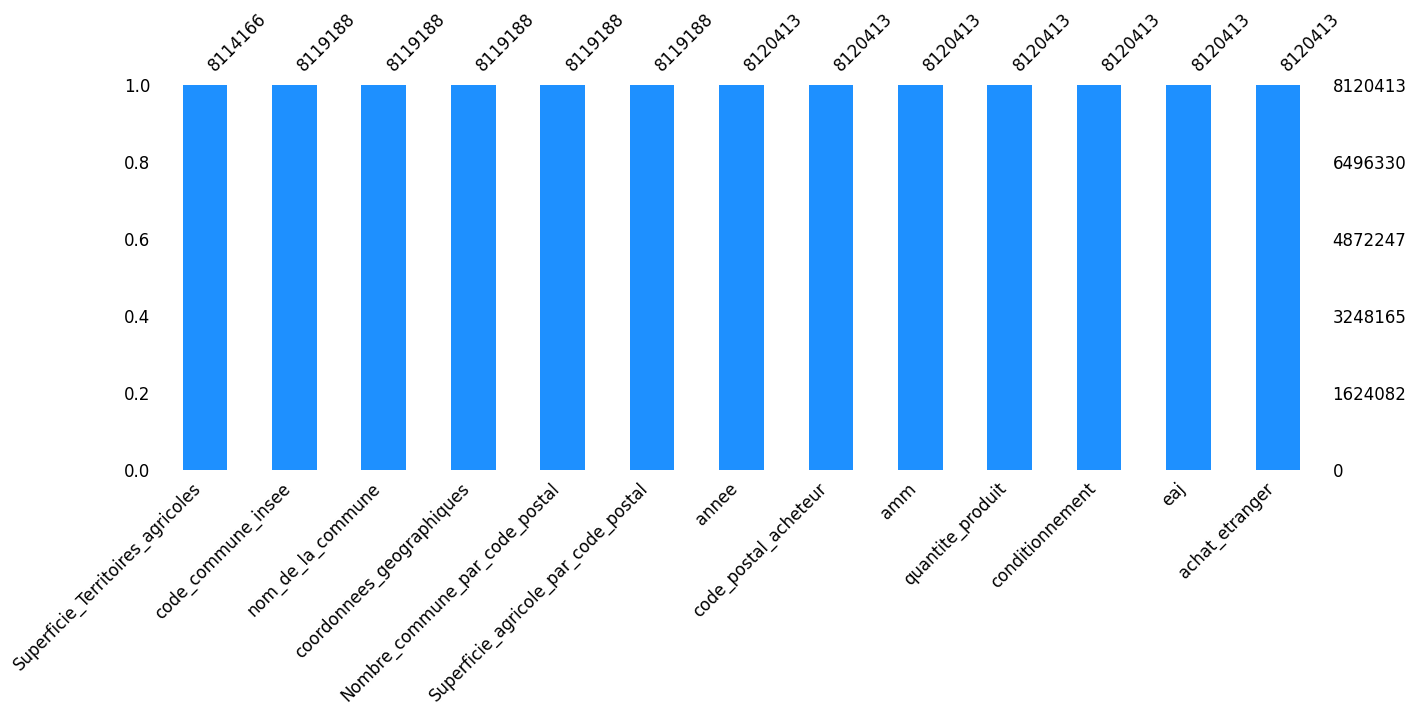

In [89]:
# Graph pour représenter les valeurs manquantes
msno.bar(df_produit_commune,
         color="dodgerblue",
         sort="ascending",
         figsize=(15, 5),
         fontsize=12
         )

Lorsque le code insee est manquant, le code postal acheteur est 0.

In [90]:
# Enlever les nc de la quantité de produit
df_produit_commune.loc[df_produit_commune["quantite_produit"] == "nc", "quantite_produit"] = np.nan

In [91]:
# changer les quantités en fonction de la surface agricole
df_produit_commune['quantite_produit_par_commune'] = np.where((df_produit_commune['Superficie_Territoires_agricoles'].notna()
                                                               & df_produit_commune['Superficie_Territoires_agricoles'] > 0.),
                                                              ((df_produit_commune['quantite_produit'].astype(float)
                                                                * df_produit_commune['Superficie_Territoires_agricoles'])
                                                                / df_produit_commune['Superficie_agricole_par_code_postal']),
                                                                df_produit_commune['quantite_produit'].astype(float))

df_produit_commune.loc[(((df_produit_commune['Superficie_Territoires_agricoles'] == 0.)
                        & (df_produit_commune['Nombre_commune_par_code_postal'] != 1))),
                        'quantite_produit_par_commune'] = 0.00

df_produit_commune.loc[(((df_produit_commune['Superficie_Territoires_agricoles'].isna())
                        & (df_produit_commune['Nombre_commune_par_code_postal'] > 1))),
                        'quantite_produit_par_commune'] = (df_produit_commune['quantite_produit'].astype(float)
                                                           / df_produit_commune['Nombre_commune_par_code_postal'])

df_produit_commune.loc[(((df_produit_commune['Superficie_Territoires_agricoles'] == 0.)
                        & (df_produit_commune['Superficie_agricole_par_code_postal'] == 0.)
                        & (df_produit_commune['Nombre_commune_par_code_postal'] > 1))),
                        'quantite_produit_par_commune'] = (df_produit_commune['quantite_produit'].astype(float)
                                                           / df_produit_commune['Nombre_commune_par_code_postal'])

In [92]:
df_produit_commune.sort_values(by=['code_postal_acheteur', 'code_commune_insee'])

annee  code_postal_acheteur      amm quantite_produit  \
5115692   2021                     0  1030003          7197.14   
5115693   2021                     0  2000003              316   
5115694   2021                     0  2000017            28.18   
5115695   2021                     0  2000018        100119.67   
5115696   2021                     0  2000044              471   
...        ...                   ...      ...              ...   
5118267   2021                 97680  2189996              5.0   
5118268   2021                 97680  8800841              1.5   
5118269   2021                 97680  9700332             30.0   
5118270   2021                 97680  9800219             50.0   
5118271   2021                 97680  9800336              3.0   

        conditionnement  eaj achat_etranger code_commune_insee  \
5115692               l  Oui            Non                NaN   
5115693               l  Non            Non                NaN   
5115694               l  Oui            Non                NaN   
5115695              kg  Non            Non                NaN   
5115696               l  Non            Non                NaN   
...                 ...  ...            ...                ...   
5118267               l  Non            Non              97617   
5118268               l  Non            Non              97617   
5118269               l  Non            Non              97617   
5118270               l  Non            Non              97617   
5118271               l  Non            Non              97617   

        nom_de_la_commune  coordonnees_geographiques  \
5115692               NaN                        NaN   
5115693               NaN                        NaN   
5115694               NaN                        NaN   
5115695               NaN                        NaN   
5115696               NaN                        NaN   
...                   ...                        ...   
5118267          TSINGONI  -12.782686007,45.13457636   
5118268          TSINGONI  -12.782686007,45.13457636   
5118269          TSINGONI  -12.782686007,45.13457636   
5118270          TSINGONI  -12.782686007,45.13457636   
5118271          TSINGONI  -12.782686007,45.13457636   

         Superficie_Territoires_agricoles  Nombre_commune_par_code_postal  \
5115692                               NaN                             NaN   
5115693                               NaN                             NaN   
5115694                               NaN                             NaN   
5115695                               NaN                             NaN   
5115696                               NaN                             NaN   
...                                   ...                             ...   
5118267                               NaN                             1.0   
5118268                               NaN                             1.0   
5118269                               NaN                             1.0   
5118270                               NaN                             1.0   
5118271                               NaN                             1.0   

         Superficie_agricole_par_code_postal  quantite_produit_par_commune  
5115692                                  NaN                       7197.14  
5115693                                  NaN                        316.00  
5115694                                  NaN                         28.18  
5115695                                  NaN                     100119.67  
5115696                                  NaN                        471.00  
...                                      ...                           ...  
5118267                                  0.0                          5.00  
5118268                                  0.0                          1.50  
5118269                                  0.0                         30.00  
5118270                                  0.0           

In [93]:
# Vérifier que les quantité de produits correspondent aux valeurs originales
quantite_produit_commune = df_produit_commune['quantite_produit_par_commune'].sum()

df_produit.loc[df_produit["quantite_produit"] == "nc", "quantite_produit"] = np.nan
quantite_produit_original = df_produit['quantite_produit'].astype(float).sum()

# Comparaison
if ((quantite_produit_commune < (quantite_produit_original - quantite_produit_original * 0.0001))
    | (quantite_produit_commune > (quantite_produit_original + quantite_produit_original * 0.0001))):
    print("Les quantités sont différentes",
          (quantite_produit_commune * 100) / quantite_produit_original,
          "%")
else:
    print("Les quantités diffèrent de moins de 0.01%")

Les quantités diffèrent de moins de 0.01%


**Pour df_substance**

In [94]:
def dataframe_par_commune(df_substance, code_insee_avec_superficie_agricole, quantite="quantite_substance"):
    
    # Ajouter les superficies agricoles pour chaque code postal
    df_merge = pd.merge(df_substance,
                        code_insee_avec_superficie_agricole,
                        how='left',
                        left_on='code_postal_acheteur',
                        right_on='code_postal')
    
    # Supprimer colonne en double
    df_merge.drop(columns=['code_postal'], inplace=True)

    # Changer les valeurs 'nc' des quantités pour faire ajuster les quantités par communes
    df_merge[quantite] = np.where((df_merge[quantite] == "nc"),
                                  np.nan,
                                  df_merge[quantite])

    # changer les quantités en fonction de la surface agricole
    df_merge['quantite_par_commune'] = np.where((df_merge['Superficie_Territoires_agricoles'].notna()
                                                 & df_merge['Superficie_Territoires_agricoles'] > 0.),
                                                 ((df_merge[quantite].astype(float)
                                                  * df_merge['Superficie_Territoires_agricoles'])
                                                  / df_merge['Superficie_agricole_par_code_postal']),
                                                  df_merge[quantite].astype(float))

    df_merge.loc[(((df_merge['Superficie_Territoires_agricoles'] == 0.)
                   & (df_merge['Nombre_commune_par_code_postal'] != 1))),
                   'quantite_par_commune'] = 0.00

    df_merge.loc[(((df_merge['Superficie_Territoires_agricoles'].isna())
                   & (df_merge['Nombre_commune_par_code_postal'] > 1))),
                   'quantite_par_commune'] = (df_merge[quantite].astype(float)
                                              / df_merge['Nombre_commune_par_code_postal'])

    df_merge.loc[(((df_merge['Superficie_Territoires_agricoles'] == 0.)
                   & (df_merge['Superficie_agricole_par_code_postal'] == 0.)
                   & (df_merge['Nombre_commune_par_code_postal'] > 1))),
                   'quantite_par_commune'] = (df_merge[quantite].astype(float)
                                              / df_merge['Nombre_commune_par_code_postal'])
    
    df_par_commune = df_merge.sort_values(by=['code_postal_acheteur', 'code_commune_insee'])

    return df_par_commune

In [95]:
df_substance_commune = dataframe_par_commune(df_substance, df_superficie_agricole, quantite = "quantite_substance")

# Connaitre la taille
print("Le jeu de données se compose de",
      df_substance_commune.shape[0], "lignes et",
      df_substance_commune.shape[1], "colonnes.")

df_substance_commune.head()

Le jeu de données se compose de 11712936 lignes et 16 colonnes.


annee  code_postal_acheteur      amm  \
7429573   2021                     0  1030003   
7429574   2021                     0  2000003   
7429575   2021                     0  2000017   
7429576   2021                     0  2000018   
7429577   2021                     0  2000044   

                                     substance          cas  \
7429573   polymere carboxyl sulfone cationique    8061-53-8   
7429574                           metazachlore   67129-08-2   
7429575                        tau-fluvalinate  102851-06-9   
7429576  soufre pour pulverisation (micronise)    7704-34-9   
7429577                      fluazifop-p-butyl   79241-46-6   

        quantite_substance classification classification_mention  \
7429573         3540.99288          Autre                    NaN   
7429574              158.0            CMR                    NaN   
7429575             6.7632          Env A                    NaN   
7429576          80095.736          Autre                    NaN   
7429577             58.875            CMR                    NaN   

        achat_etranger code_commune_insee nom_de_la_commune  \
7429573            Non                NaN               NaN   
7429574            Non                NaN               NaN   
7429575            Non                NaN               NaN   
7429576            Non                NaN               NaN   
7429577            Non                NaN               NaN   

        coordonnees_geographiques  Superficie_Territoires_agricoles  \
7429573                       NaN                               NaN   
7429574                       NaN                               NaN   
7429575                       NaN                               NaN   
7429576                       NaN                               NaN   
7429577                       NaN                               NaN   

         Nombre_commune_par_code_postal  Superficie_agricole_par_code_postal  \
7429573                             NaN                                  NaN   
7429574                             NaN                                  NaN   
7429575                             NaN                                  NaN   
7429576                             NaN                                  NaN   
7429577                             NaN                                  NaN   

         quantite_par_commune  
7429573            3540.99288  
7429574             158.00000  
7429575               6.76320  
7429576           80095.73600  
7429577              58.87500

In [96]:
# Vérifier que les quantité de produits correspondent aux valeurs originales
quantite_substance_commune = df_substance_commune['quantite_par_commune'].sum()

df_substance.loc[df_substance["quantite_substance"] == "nc", "quantite_substance"] = np.nan
quantite_substance_original = df_substance['quantite_substance'].astype(float).sum()

# Comparaison
if ((quantite_substance_commune < (quantite_substance_original - quantite_substance_original * 0.0001))
    | (quantite_substance_commune > (quantite_substance_original + quantite_substance_original * 0.0001))):
    print("Les quantités sont différentes",
          (quantite_substance_commune * 100) / quantite_substance_original,
          "%")
else:
    print("Les quantités diffère de moins de 0.01%")

Les quantités diffère de moins de 0.01%


In [95]:
target_z.close()

filePath = Path(path)

try:
    filePath.unlink()
except OSError as e:
    print(f"Error:{ e.strerror}")